In [1]:
import numpy as np
import matplotlib.pyplot as plt
import correctionlib

In [2]:
#filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_systematics_v06/semileptonic_triggerSF/triggerSF_2018_Ele32_EleHT/sf_trigger_electron_etaSC_vs_electron_pt_2018_Ele32_EleHT_pass_v10.json"
#filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_splitHT_v06/semileptonic_triggerSF/triggerSF_2018_Ele32_EleHT_splitHT/sf_trigger_electron_etaSC_vs_electron_pt_2018_Ele32_EleHT_pass_v03.json"
#filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_spliteras_v06/semileptonic_triggerSF/triggerSF_2018_Ele32_EleHT_spliteras/sf_trigger_electron_etaSC_vs_electron_pt_2018_Ele32_EleHT_pass.json"
#filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_spliteras_v06/semileptonic_triggerSF/triggerSF_2018_Ele32_EleHT_spliteras/sf_trigger_electron_etaSC_vs_electron_pt_2018_Ele32_EleHT_pass_v03.json"
filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_allsystematics_v03/semileptonic_triggerSF/triggerSF_2018_Ele32_EleHT_allsystematics/sf_trigger_electron_etaSC_vs_electron_pt_2018_Ele32_EleHT_pass_v07.json"
cset = correctionlib.CorrectionSet.from_file(filename)
key = list(cset.keys())[0]
corr = cset[key]
corr.description

'SF matching the semileptonic trigger efficiency in MC and data.'

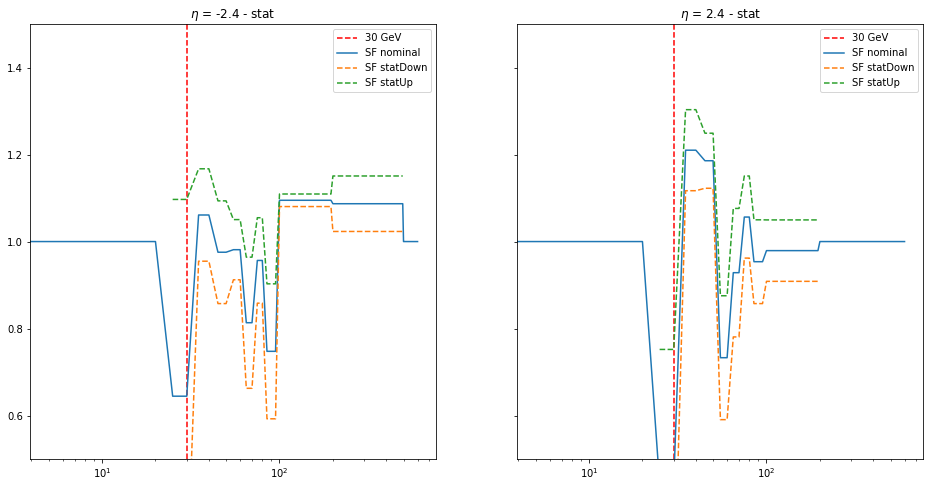

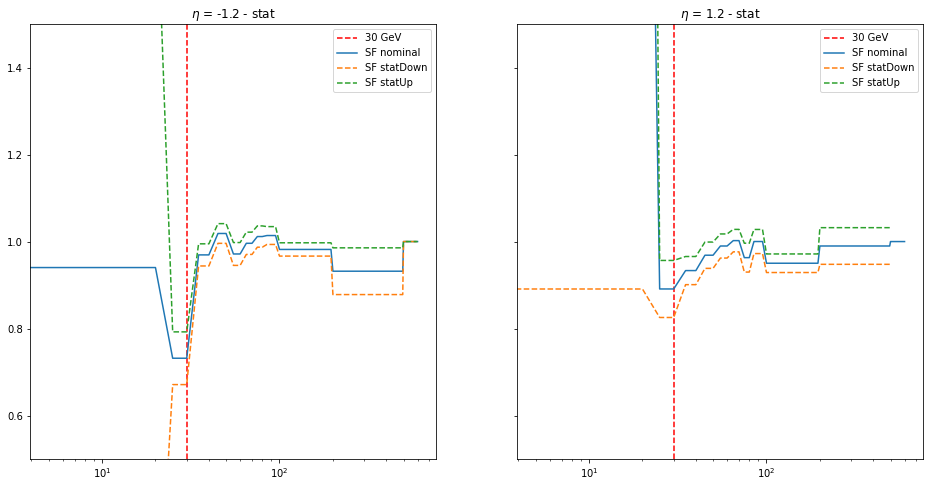

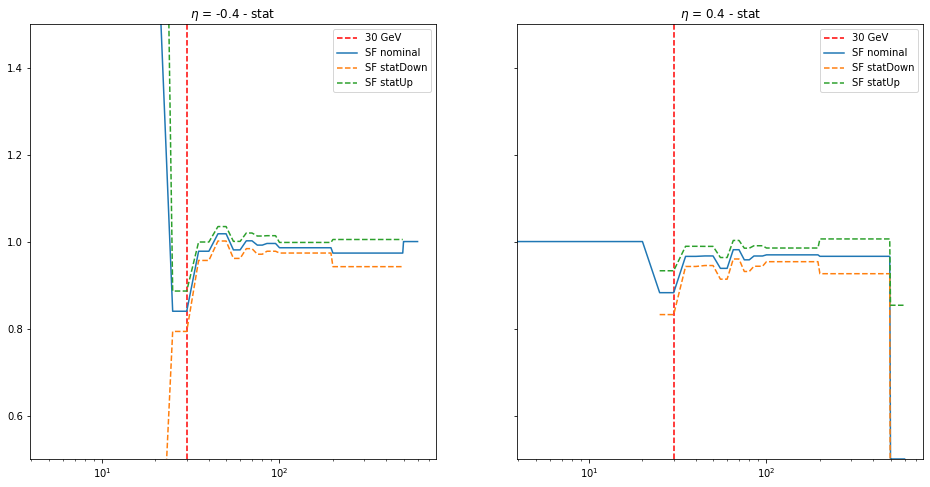

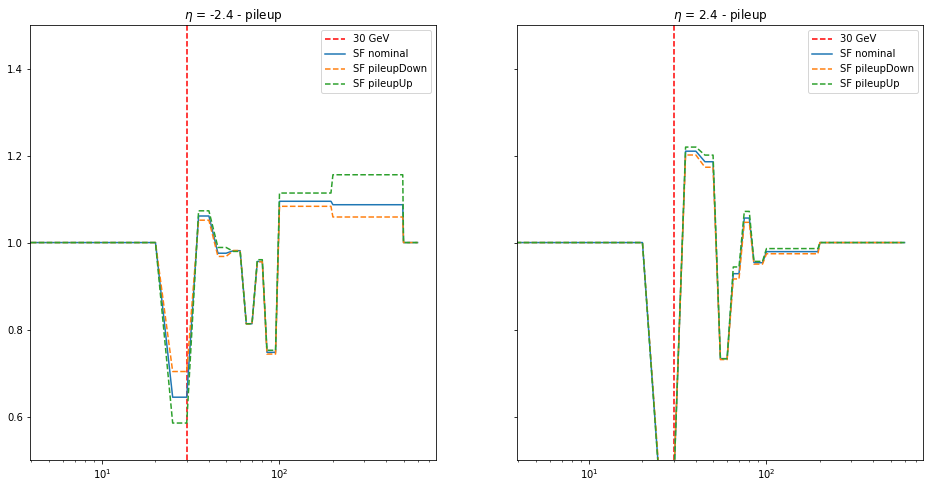

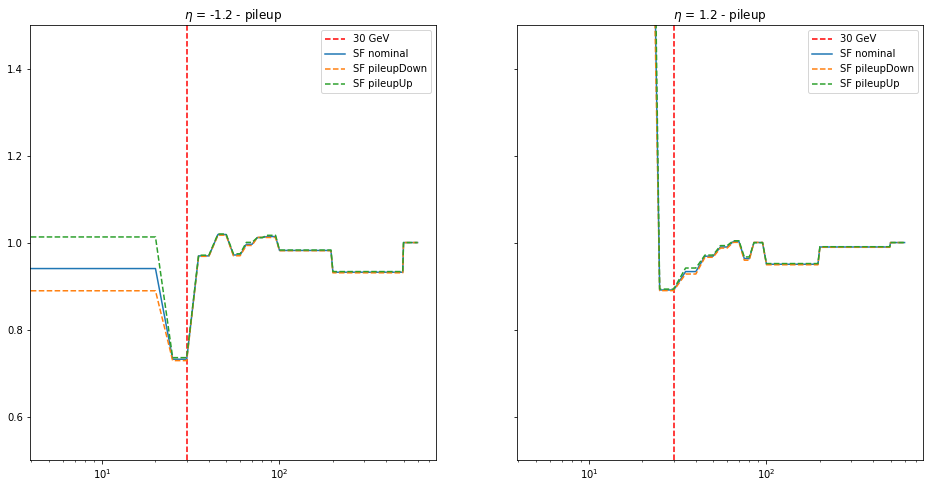

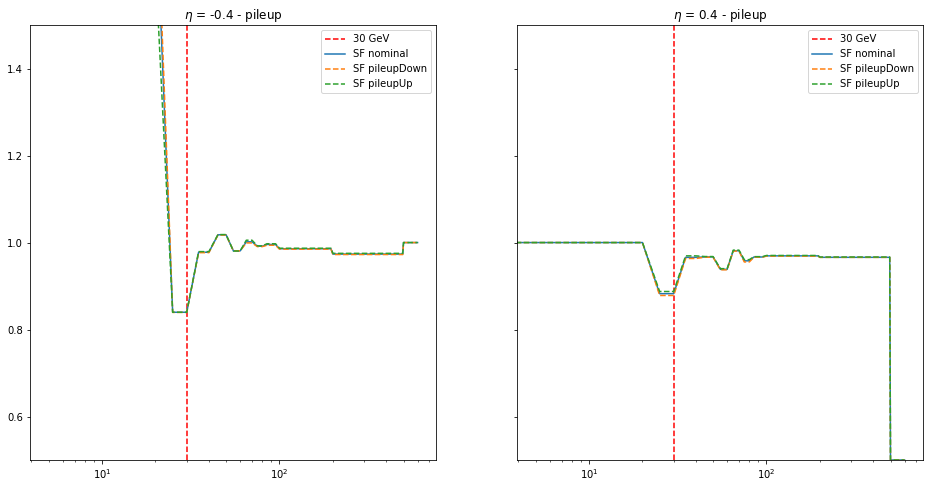

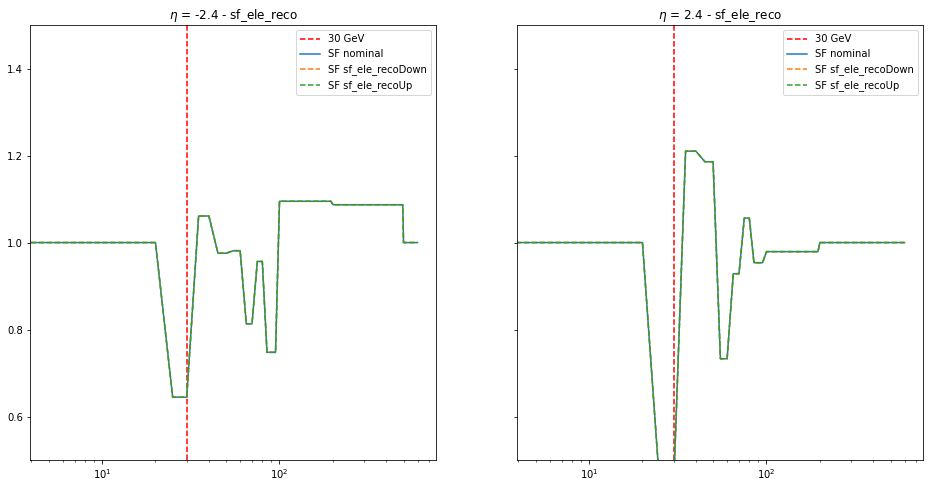

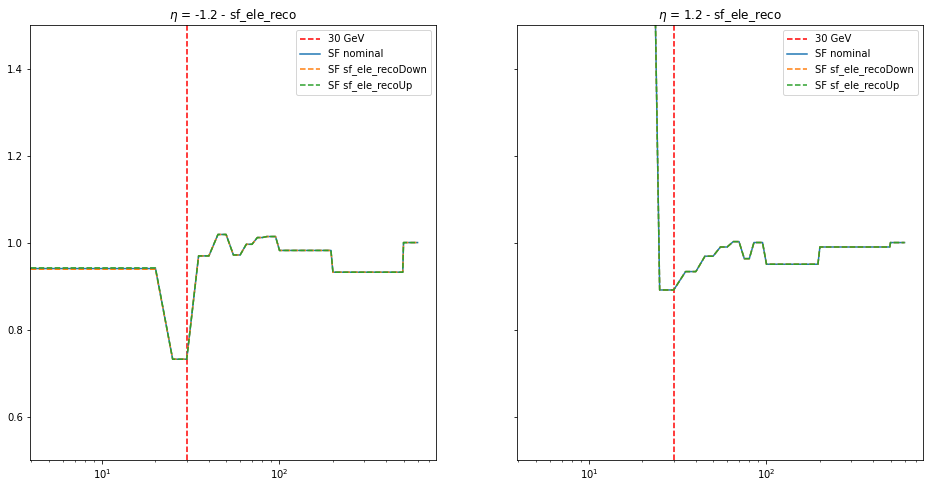

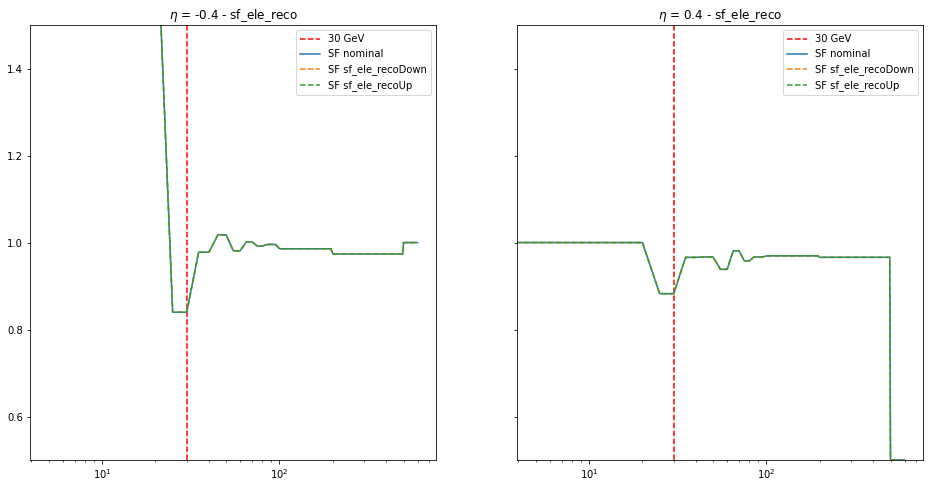

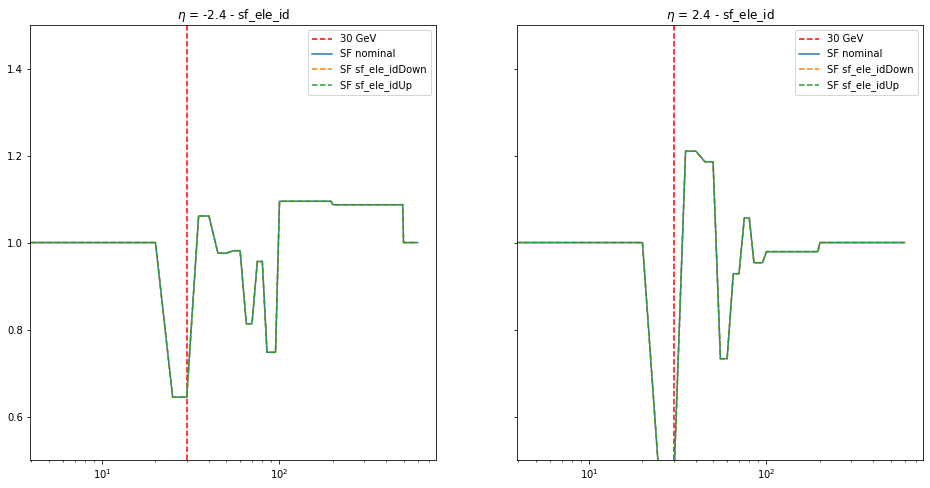

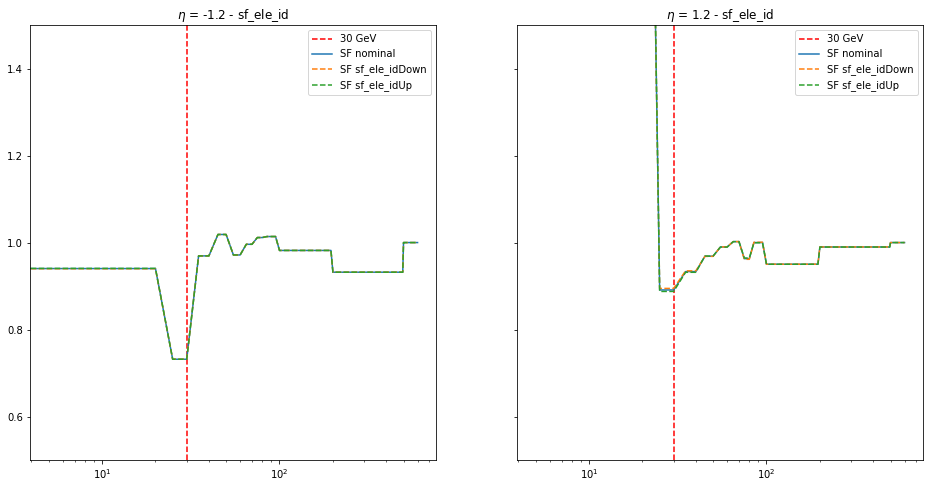

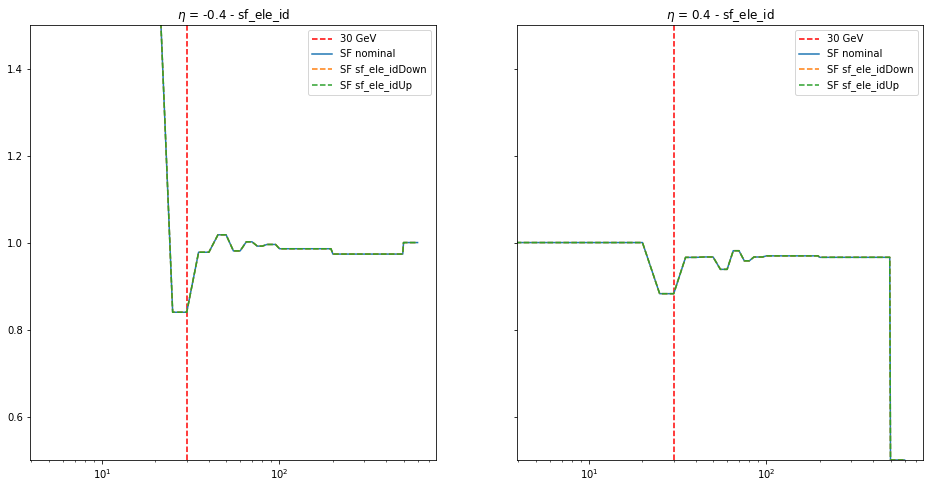

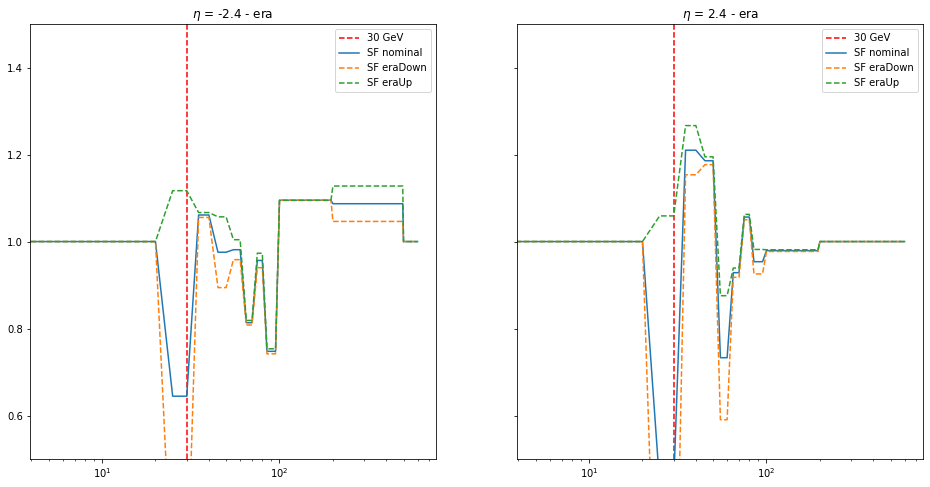

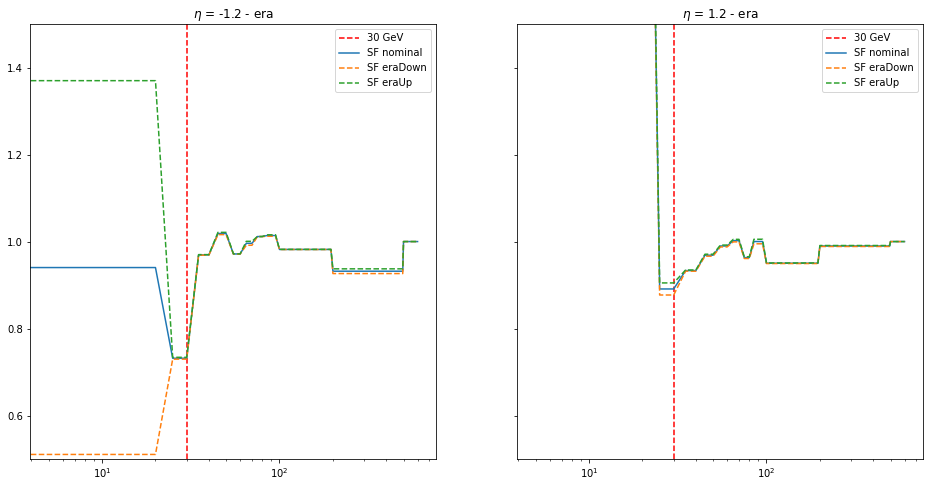

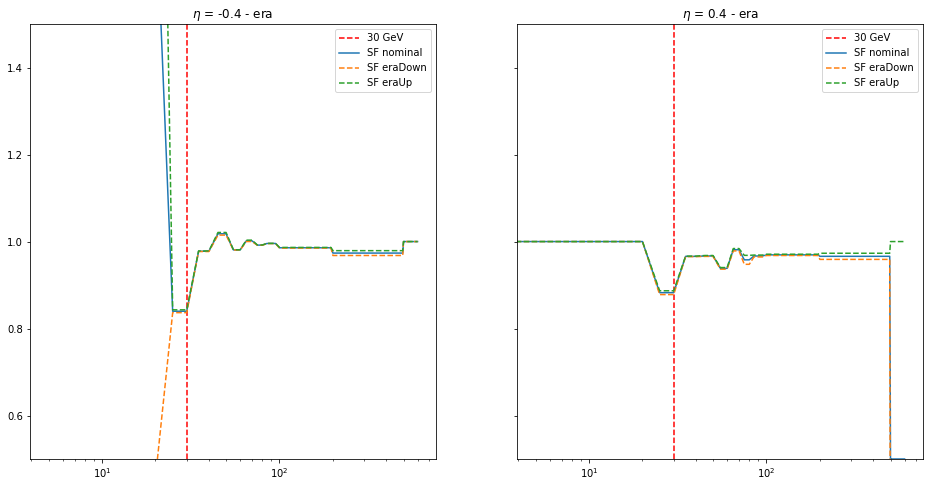

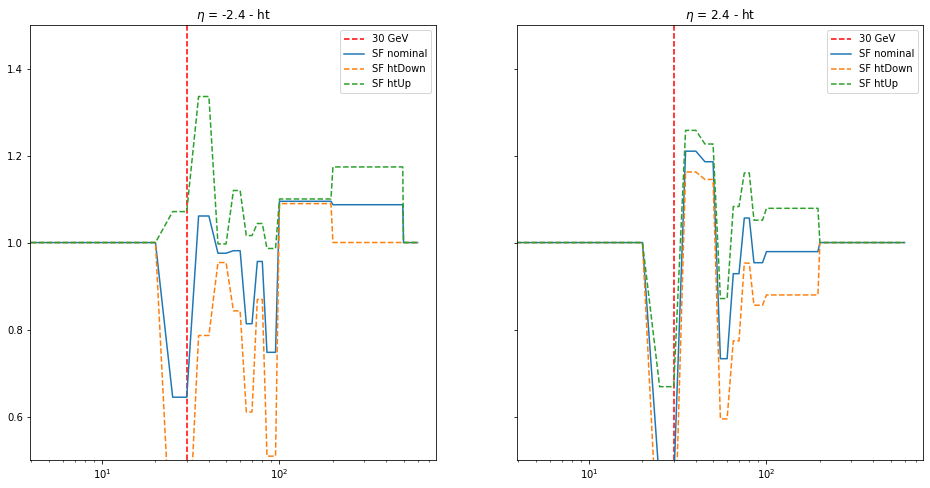

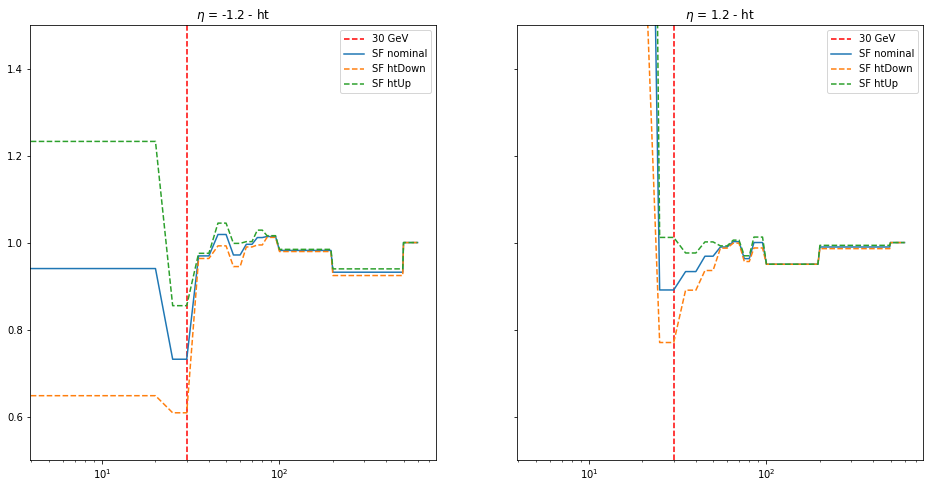

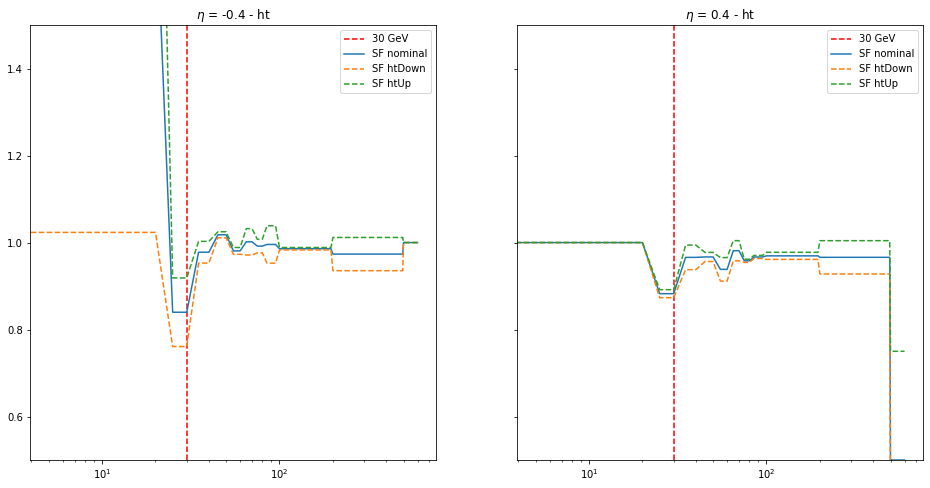

In [3]:
pt = np.arange(0, 605, 5)
eta = [-2.4, 2.4, -1.2, 1.2, -0.4, 0.4]
ncol = 2
ylim = (0.5, 1.5)
#syst = "stat"
style = {"nominal" : '-', f"Down" : 'dashed', f"Up" : 'dashed'}
#style = {"tot" : '-'}
#for era in ['A', 'B', 'C', 'D']:
#    style[era] = 'dashed'

#for syst in ["stat", "pileup", "sf_ele_id", "sf_ele_reco"]:
#for syst in ["ht"]:
for syst in ["stat", "pileup", "sf_ele_reco", "sf_ele_id", "era", "ht"]:
    for i,e in enumerate(eta):
        if i%ncol==0:
            fig, axes = plt.subplots(1, ncol, figsize=[ncol*8,8], sharey=True)
        axes[i%ncol].vlines(30, *ylim, linestyle='dashed', color='red', label='30 GeV')
        for var in ["nominal", "Down", "Up"]:
        #for var in ["tot", "A", "B", "C", "D"]:
            label = var if var == 'nominal' else f"{syst}{var}"
            sf = corr.evaluate(label, pt, e)
            axes[i%ncol].plot(pt, sf, linestyle=style[var], label=f"SF {label}");
            axes[i%ncol].set_title(f"$\eta$ = {e} - {syst}")
            axes[i%ncol].set_ylim(*ylim);
            axes[i%ncol].set_xscale("log");
            axes[i%ncol].legend()

In [8]:
filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_allsystematics_v04/semileptonic_triggerSF/triggerSF_2018_Ele32_EleHT_allsystematics/sf_trigger_electron_pt_2018_Ele32_EleHT_pass_v03.json"
cset = correctionlib.CorrectionSet.from_file(filename)
key = list(cset.keys())[0]
corr = cset[key]
corr.description

'SF matching the semileptonic trigger efficiency in MC and data.'

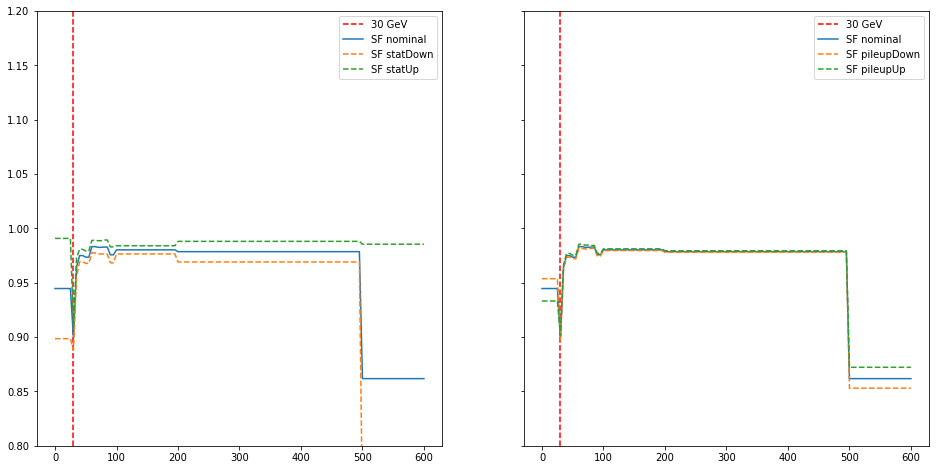

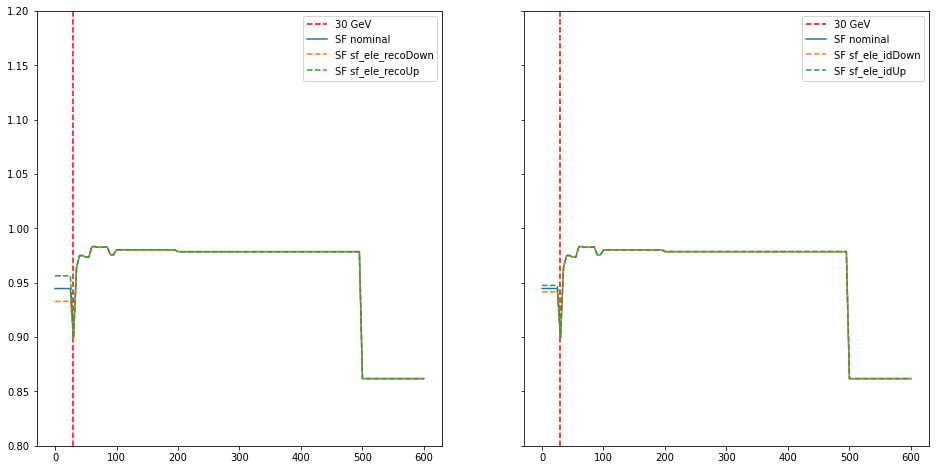

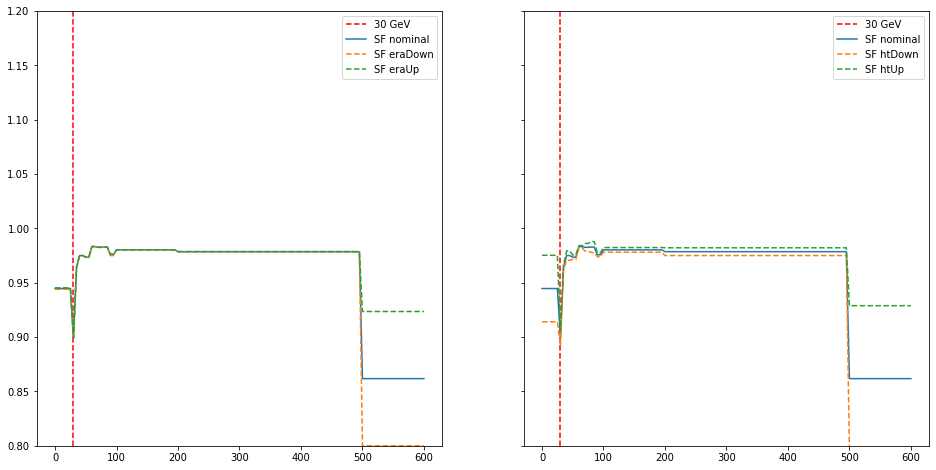

In [10]:
pt = np.arange(0, 605, 5)
eta = [-2.4, 2.4, -1.2, 1.2, -0.4, 0.4]
ncol = 2
ylim = (0.8, 1.2)
#syst = "stat"
style = {"nominal" : '-', f"Down" : 'dashed', f"Up" : 'dashed'}
#style = {"tot" : '-'}
#for era in ['A', 'B', 'C', 'D']:
#    style[era] = 'dashed'

#for syst in ["stat", "pileup", "sf_ele_id", "sf_ele_reco"]:
#for syst in ["ht"]:
for i, syst in enumerate(["stat", "pileup", "sf_ele_reco", "sf_ele_id", "era", "ht"]):
    if i%ncol==0:
        fig, axes = plt.subplots(1, ncol, figsize=[ncol*8,8], sharey=True)
    axes[i%ncol].vlines(30, *ylim, linestyle='dashed', color='red', label='30 GeV')
    for var in ["nominal", "Down", "Up"]:
    #for var in ["tot", "A", "B", "C", "D"]:
        label = var if var == 'nominal' else f"{syst}{var}"
        sf = corr.evaluate(label, pt)
        axes[i%ncol].plot(pt, sf, linestyle=style[var], label=f"SF {label}");
        #axes[i%ncol].set_title(f"$\eta$ = {e} - {syst}")
        axes[i%ncol].set_ylim(*ylim);
        #axes[i%ncol].set_xscale("log");
        axes[i%ncol].legend()

In [29]:
x = np.array([41., 100., 200., 350.])
nominal = corr.evaluate("nominal", x)
nominal

array([0.97498081, 0.98023531, 0.97856402, 0.97856402])

In [41]:
statDown = corr.evaluate("statDown", x)
statUp   = corr.evaluate("statUp", x)
yerr = np.array([nominal - statDown, statUp - nominal])
yerr

array([[0.00572215, 0.00377969, 0.00947725, 0.00947725],
       [0.00572215, 0.00377969, 0.00947725, 0.00947725]])

<ErrorbarContainer object of 3 artists>

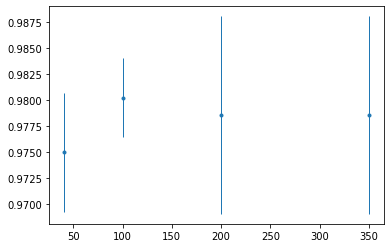

In [43]:
plt.errorbar(x, y, yerr=yerr, marker='.', elinewidth=1, linestyle='solid', linewidth=0)
#plt.ylim(0.974, 0.976);

In [67]:
cset.keys()

KeysView(<correctionlib.highlevel.CorrectionSet object at 0x7f7f7bf24610>)